# Transformacion de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('../Datasets/pima-indians-diabetes.csv', names=names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
array = data.values
X = array[ : ,0:8]
Y = array[:, 8]

# Rescalar los datos
Vamos a reescalar entre 0 y 1 nuestros datos.

In [4]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

El escalamiento esta definido entre 0,1 pero puedo definir otros utilizando esta linea

scaler = MinMaxScaler(feature_range=(0,1))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(names)
print(rescaledX)


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


# Estandarizacion
(Asume distribucion gausiana). Es otro tipo de escalamiento que se utiliza muchismo para algorimtos de regresion

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(names)
print(rescaledX)


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[ 0.64   0.848  0.15  ...  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ... -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ... -1.103  0.604 -0.106]
 ...
 [ 0.343  0.003  0.15  ... -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ... -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ... -0.202 -0.474 -0.871]]


# Normalizacion
Es el valor entre 0-1

In [7]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

print(names)
print(normalizedX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# Binarizacion

In [8]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
print(names)
print(binaryX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Box-Cox

Muchos casos, asumimos que nuestros datos tienen una districucion guasiana. Pero en la realidad, no es asi. Por eso tenemos este Box-Cox

/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/3571640168.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/3571640168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pedi'])
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/3571640168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level

<Figure size 640x480 with 0 Axes>

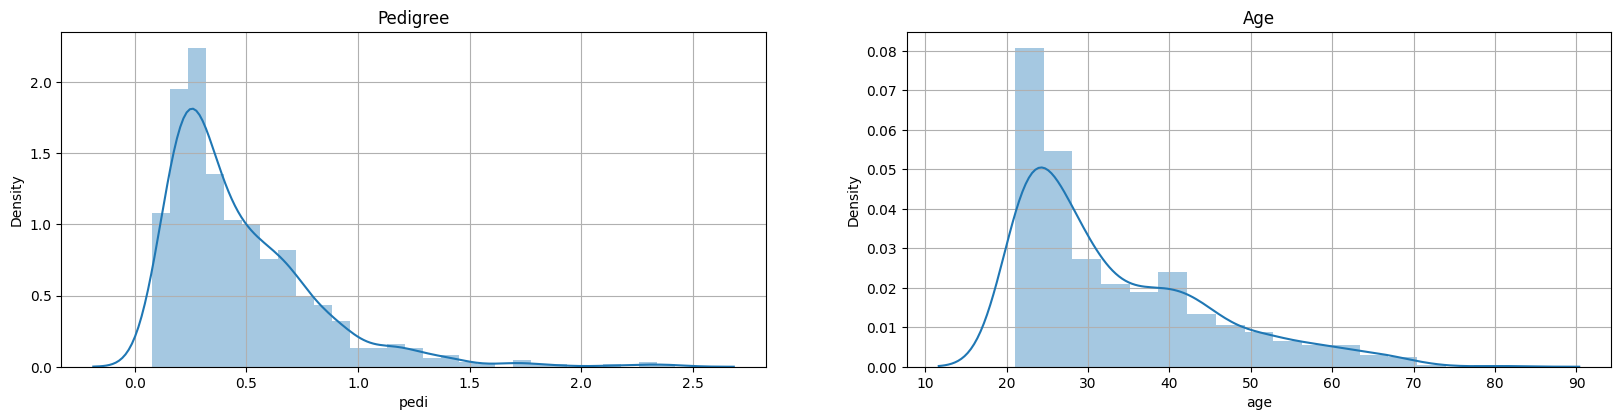

In [9]:
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(data['pedi'])
plt.title('Pedigree')
plt.grid(True)

plt.subplot(422)
sns.distplot(data["age"])
plt.title("Age")
plt.grid(True)
plt.show()

Podemos ver que tenemos en Pedigree y en AGE un sesgo hacia la izquierda. Esto suele dar malos resultados en algoritmos de IA. Vamos a corregir ese sesgo con Box-Cox.

In [10]:
from sklearn.preprocessing import PowerTransformer
# Extraemos las categorias con sesgo
features = data[['pedi', 'age']]
pt = PowerTransformer(method='box-cox', standardize=True,)

skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features)
df_features = pd.DataFrame(data=skl_boxcox, columns=['pedi', 'age'])
df_features.head()

# Pasamos las caracterisiticas escaladas al  dataset original
data.drop(['age'], axis=1, inplace=True)
data.drop(['pedi'], axis=1, inplace=True)
df_data=pd.concat([data, df_features], axis=1)
cols = df_data.columns.tolist()
cols

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'class', 'pedi', 'age']

In [11]:
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df_data = df_data[cols]
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.776754,1.362797,6,148,72,35,0,33.6,1
1,-0.112234,0.127990,1,85,66,29,0,26.6,0
2,0.880461,0.231506,8,183,64,0,0,23.3,1
3,-1.306876,-1.483064,1,89,66,23,94,28.1,0
4,2.629492,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-1.267799,1.764261,10,101,76,48,180,32.9,0
764,-0.162124,-0.366775,2,122,70,27,0,36.8,0
765,-0.682369,0.017237,5,121,72,23,112,26.2,0
766,-0.121179,1.236934,1,126,60,0,0,30.1,1


/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

<Figure size 640x480 with 0 Axes>

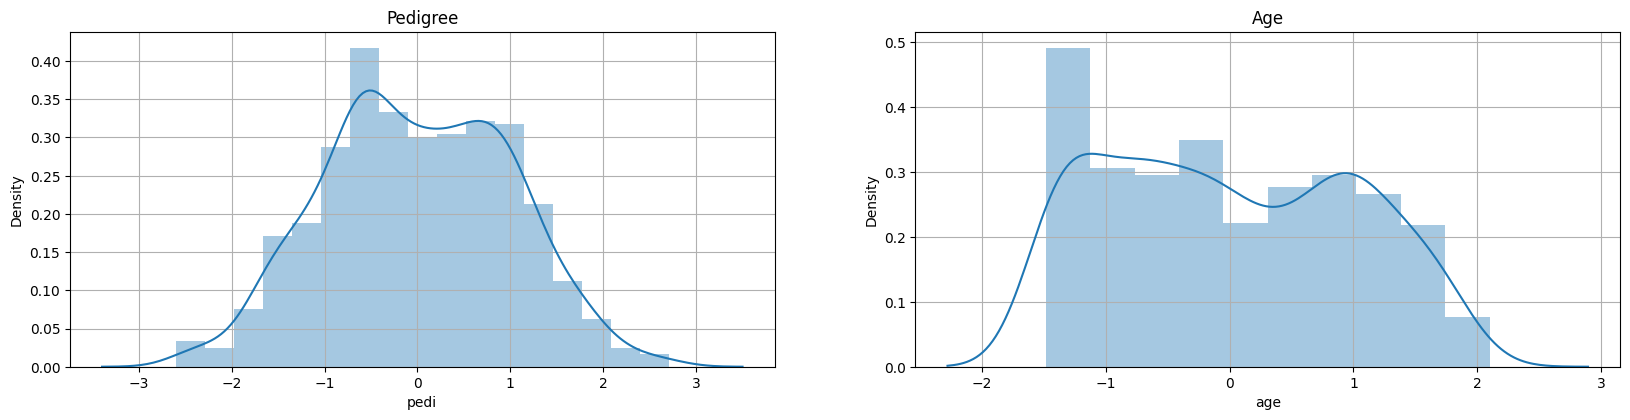

In [12]:
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)

plt.subplot(422)
sns.distplot(df_data["age"])
plt.title("Age")
plt.grid(True)
plt.show()

Ahora se puede ver como hemos corregido ese sesgo que teniamos

# Yeo-Jhonson
Es el mismo caso que teniamos (Box-cox), pero se utiliza si tenemos valores negativos

In [14]:
from sklearn.preprocessing import PowerTransformer
# Extraemos las categorias con sesgo
features = data[['pedi', 'age']]
pt = PowerTransformer(method='yeo-johnson', standardize=True,)

skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features)
df_features = pd.DataFrame(data=skl_boxcox, columns=['pedi', 'age'])
df_features.head()

# Pasamos las caracterisiticas escaladas al  dataset original
data.drop(['age'], axis=1, inplace=True)
data.drop(['pedi'], axis=1, inplace=True)
df_data=pd.concat([data, df_features], axis=1)
cols = df_data.columns.tolist()
cols

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'class', 'pedi', 'age']

In [15]:
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df_data = df_data[cols]
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.821764,1.364180,6,148,72,35,0,33.6,1
1,-0.168409,0.126452,1,85,66,29,0,26.6,0
2,0.935284,0.230161,8,183,64,0,0,23.3,1
3,-1.298725,-1.480075,1,89,66,23,94,28.1,0
4,2.336680,0.327328,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-1.267837,1.765331,10,101,76,48,180,32.9,0
764,-0.222191,-0.368619,2,122,70,27,0,36.8,0
765,-0.753116,0.015535,5,121,72,23,112,26.2,0
766,-0.178081,1.238144,1,126,60,0,0,30.1,1


/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_6805/4052206375.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

<Figure size 640x480 with 0 Axes>

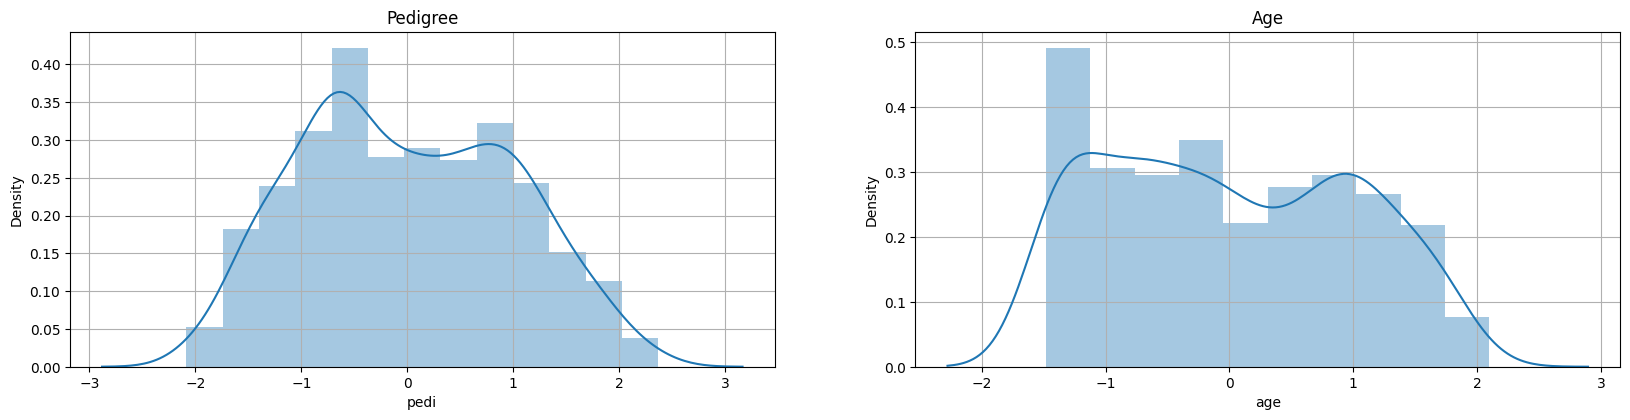

In [16]:
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)

plt.subplot(422)
sns.distplot(df_data["age"])
plt.title("Age")
plt.grid(True)
plt.show()

Podemos ver que queda igual